## Customer Churn Prediction modeling (Kaggle inclass) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('C:/Users/jharbour/Desktop/Train_Churn_binary Kaggle.csv')
test = pd.read_csv("C:/Users/jharbour/Desktop/Test_Churn KAggle.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5282 non-null   object 
 1   SeniorCitizen     5282 non-null   int64  
 2   Partner           5282 non-null   object 
 3   Dependents        5282 non-null   object 
 4   tenure            5282 non-null   int64  
 5   PhoneService      5282 non-null   object 
 6   MultipleLines     5282 non-null   object 
 7   InternetService   5282 non-null   object 
 8   OnlineSecurity    5282 non-null   object 
 9   OnlineBackup      5282 non-null   object 
 10  DeviceProtection  5282 non-null   object 
 11  TechSupport       5282 non-null   object 
 12  StreamingTV       5282 non-null   object 
 13  StreamingMovies   5282 non-null   object 
 14  Contract          5282 non-null   object 
 15  PaperlessBilling  5282 non-null   object 
 16  PaymentMethod     5282 non-null   object 


In [4]:
train.shape,test.shape 

((5282, 20), (1761, 20))

In [5]:
# Converting "No internet service" to "No" for the columns listed below
cols = ['OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'OnlineSecurity']

for i in cols:
    train[i] = train[i].replace({"No internet service": "No"})

In [6]:
# Converting "No phone service" to "No" for the columns listed below
train.MultipleLines = train.MultipleLines.replace({'No phone service':"No"})

In [7]:
#Addressing numeric features
train.TotalCharges = pd.to_numeric(train.TotalCharges, errors = 'coerce')

train.TotalCharges.fillna(train['TotalCharges'].mean(),inplace=True)

train.TotalCharges.isnull().sum()

0

In [8]:
#Idea: Use the average monthly charge most common services, to create new features
round(train.MonthlyCharges.mean(),2)

64.5

In [9]:
train.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,Yes,40,No,No,DSL,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,50.85,2036.55,0
1,Male,0,Yes,No,5,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,81.30,416.30,1


In [10]:
train.shape

(5282, 20)

In [11]:
month = (train['Contract'] == 'Month-to-month')  & (train.Churn == 1) 
train[month]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,Male,0,Yes,No,5,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,81.30,416.30,1
8,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,No,Electronic check,80.50,80.50,1
10,Female,1,No,No,37,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,2841.55,1
12,Male,0,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,45.35,89.50,1
13,Female,1,Yes,No,28,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),101.30,2812.20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5248,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,1
5261,Male,0,No,No,5,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,49.20,216.90,1
5265,Male,0,No,No,56,Yes,Yes,Fiber optic,No,Yes,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,94.45,5124.60,1
5270,Female,0,No,No,1,No,No,DSL,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,35.75,35.75,1


In [12]:
len(train[month])

1239

#### Identifying the percentage of customers with month-to-month contracts that churn

In [13]:
(len(train[month])/5282)*100 # the number of churned customers with month-to-month 

23.457023854600532

In [14]:
# Creating variables and percents representing the percentage of customers leaving. 

percents = train['Churn'].value_counts(normalize = True ).mul(100).round(2)
#perc_churned = churn_df[churn_df.Churn == "1"].shape[0]
percents

0    73.61
1    26.39
Name: Churn, dtype: float64

In [15]:
# The churn column seems to be standardized since all the descriptive stats are between 0 & 1.
# Now let's look at how many customers are/are not churnning by getting a churn count.

counts = train['Churn'].value_counts()


df = pd.DataFrame({'counts': counts, '%':percents})
retained = df['%'][0]  
print(retained,'% of customers stayed with the company')

churned = df['%'][1]
print(churned,'% of customers left with the company')

73.61 % of customers stayed with the company
26.39 % of customers left with the company


### The majority of churn comes from the month-to-month subgroup of customers.  Let's look at their average monthly charges and total charges... maybe we can additionally guage if any delenquincy is present. 

## Data Visualizations to consider

In [16]:
import pandas_profiling
pandas_profiling.ProfileReport(train)

Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
train.Contract

0       Month-to-month
1       Month-to-month
2             One year
3       Month-to-month
4       Month-to-month
             ...      
5277    Month-to-month
5278    Month-to-month
5279          Two year
5280          Two year
5281    Month-to-month
Name: Contract, Length: 5282, dtype: object

In [18]:
train.InternetService

0               DSL
1       Fiber optic
2               DSL
3               DSL
4       Fiber optic
           ...     
5277            DSL
5278    Fiber optic
5279             No
5280            DSL
5281    Fiber optic
Name: InternetService, Length: 5282, dtype: object

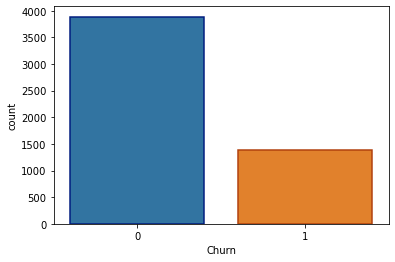

In [19]:
# Visual of customer churn 
sns.countplot(train['Churn'], edgecolor = sns.color_palette("dark", 2), linewidth = 1.5)

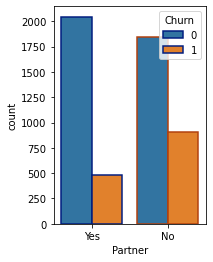

In [20]:
# plot the sub categories of the train data

plt.subplot(1,2,1)
sns.countplot('Partner', hue = 'Churn', data = train, edgecolor = sns.color_palette("dark", 2), linewidth = 1.5)

In [21]:
cat_feats = ['gender', 'Partner', 'Dependents', 'TechSupport',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'StreamingTV','DeviceProtection','SeniorCitizen',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [22]:
list(enumerate(cat_feats))

[(0, 'gender'),
 (1, 'Partner'),
 (2, 'Dependents'),
 (3, 'TechSupport'),
 (4, 'PhoneService'),
 (5, 'MultipleLines'),
 (6, 'InternetService'),
 (7, 'OnlineSecurity'),
 (8, 'OnlineBackup'),
 (9, 'StreamingTV'),
 (10, 'DeviceProtection'),
 (11, 'SeniorCitizen'),
 (12, 'StreamingMovies'),
 (13, 'Contract'),
 (14, 'PaperlessBilling'),
 (15, 'PaymentMethod')]

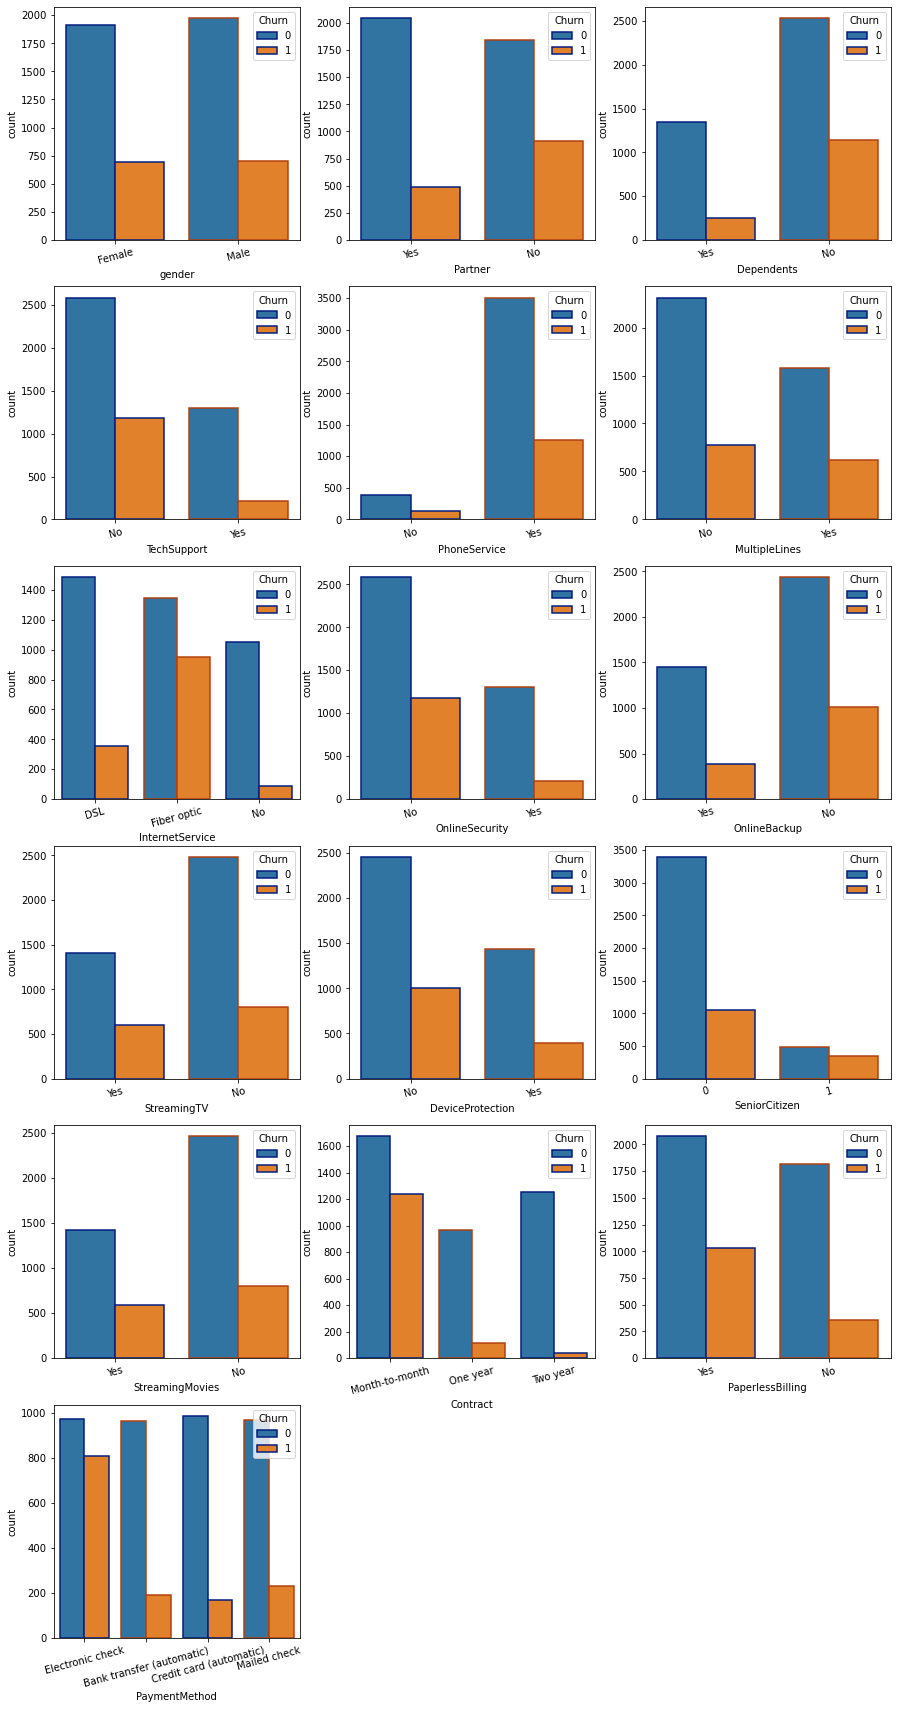

In [23]:
plt.figure(figsize = (15,30))
for i in enumerate(cat_feats):
    plt.subplot(6,3,i[0]+1)
    sns.countplot(i[1], hue = 'Churn', data = train, edgecolor = sns.color_palette("dark", 2), linewidth = 1.5)
    plt.xticks(rotation = 15)

### Looking at numerical variables

In [24]:
train['Churn2']= train['Churn'].astype(str)
train['Churn2'].replace(["0","1"],["No","Yes"], inplace = True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DFAEE773A0>,
      dtype=object)

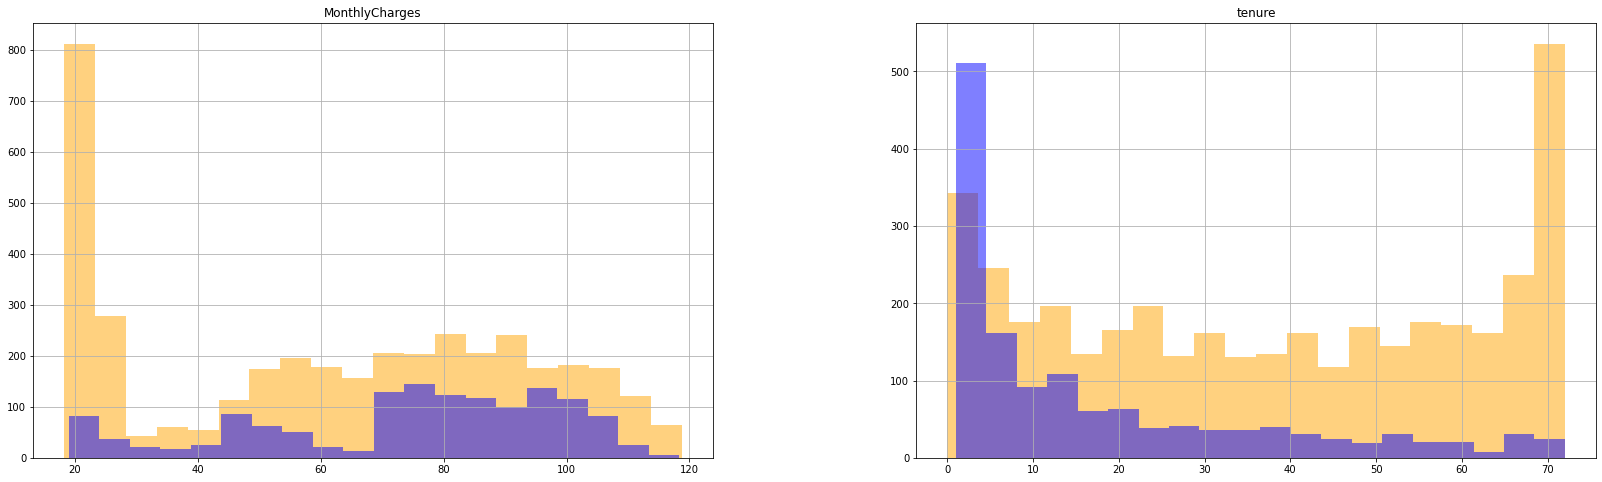

In [25]:

num_feats = ['tenure','MonthlyCharges']
fig, ax = plt.subplots(1, 2, figsize = (28,8))

train[train.Churn2 == 'No'][num_feats].hist(bins=20,color = 'orange', alpha = 0.5, ax = ax)
train[train.Churn2 == 'Yes'][num_feats].hist(bins=20,color = 'blue', alpha = 0.5, ax = ax)

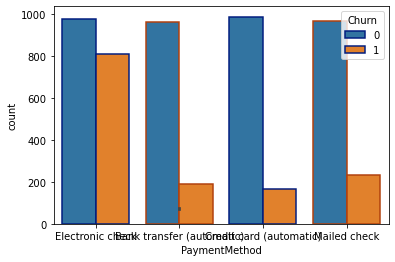

In [26]:
sns.barplot(x='Churn', y = 'MonthlyCharges', data = train)
sns.countplot(i[1], hue = 'Churn', data = train, edgecolor = sns.color_palette("dark", 2), linewidth = 1.5)

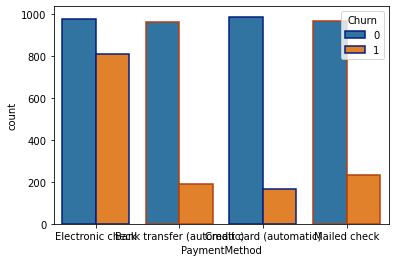

In [27]:
sns.barplot(x='Churn', y = 'tenure', data = train)
sns.countplot(i[1], hue = 'Churn', data = train, edgecolor = sns.color_palette("dark", 2), linewidth = 1.5)

In [28]:
#graph1 = sns.FacetGrid(train,col='TotalCharges', hue ="Churn", height =4, aspect=1)
#graph1.map(plt.scatter,"gender", "SeniorCitizen")

### 'Monthly Charges' shows most of the retained customers have monthly bills between roughly 20 - 30 dollars with the highest churn between 70 - 100 dollars. Secondly, 'tenure' suggests most churn occurs within the first 10 months of service.

In [29]:
#Use the average monthly charge most common services, to create a basic package offered clser to $3o

round(train.MonthlyCharges.mean(),2)

64.5

In [30]:
# Tenure and TotalCharges are two features that drive customer churn as well as SeniorCitizenship
# ... Let's look at age to produce service packages
train.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.016098,0.216524,0.101319,0.145914
tenure,0.016098,1.000000,0.246406,0.825827,-0.361497
MonthlyCharges,0.216524,0.246406,1.000000,0.647774,0.180156
TotalCharges,0.101319,0.825827,0.647774,1.000000,-0.213306
Churn,0.145914,-0.361497,0.180156,-0.213306,1.000000


In [31]:
mon_tot_chrg = (train['Contract'] == 'Month-to-month')  & (train.Churn == 1) & (train.TotalCharges)
train[mon_tot_chrg].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,1239.000000,1239.000000,1239.000000,1239.000000,1239.0
mean,0.258273,13.378531,72.253269,1096.634463,1.0
std,0.437862,15.229199,24.093061,1410.682621,0.0
min,0.000000,1.000000,18.950000,19.100000,1.0
25%,0.000000,2.000000,54.200000,94.575000,1.0
50%,0.000000,7.000000,77.500000,503.600000,1.0
75%,1.000000,19.000000,90.725000,1472.850000,1.0
max,1.000000,71.000000,114.500000,7548.100000,1.0


In [32]:
# Tenure MonthlyCharges, and TotalCharges are features that seem to drive customer churn
# ... Let's look at age to produce new features... looking at correlation
train.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.016098,0.216524,0.101319,0.145914
tenure,0.016098,1.000000,0.246406,0.825827,-0.361497
MonthlyCharges,0.216524,0.246406,1.000000,0.647774,0.180156
TotalCharges,0.101319,0.825827,0.647774,1.000000,-0.213306
Churn,0.145914,-0.361497,0.180156,-0.213306,1.000000


In [33]:
train = pd.get_dummies(train, columns = ['gender', 'Partner', 'Dependents', 'TechSupport',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'StreamingTV','DeviceProtection','SeniorCitizen',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'], drop_first = True)

In [34]:
train.head()

,tenure,MonthlyCharges,TotalCharges,Churn,Churn2,gender_Male,Partner_Yes,Dependents_Yes,TechSupport_Yes,PhoneService_Yes,...,StreamingTV_Yes,DeviceProtection_Yes,SeniorCitizen_1,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,40,50.85,2036.55,0,No,0,1,1,0,0,...,1,0,0,1,0,0,1,0,1,0
1,5,81.30,416.30,1,Yes,1,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
2,63,71.50,4576.30,0,No,1,0,0,1,1,...,0,1,0,0,1,0,0,0,1,0
3,36,34.85,1267.20,0,No,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,60,74.35,4453.30,0,No,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [35]:
train.shape

(5282, 25)

In [36]:
from sklearn.preprocessing import StandardScaler 

#Performing feature scaling on 'tenure','MonthlyCharges','TotalCharges' to bring them on the same scale 
sc = StandardScaler()
cols_for_scaling = ['tenure','MonthlyCharges','TotalCharges'] 

# Apllying feature scaling on the three columns selected above with fit_transform ()
train[cols_for_scaling] = sc.fit_transform(train[cols_for_scaling])

In [37]:
train.head(2)

,tenure,MonthlyCharges,TotalCharges,Churn,Churn2,gender_Male,Partner_Yes,Dependents_Yes,TechSupport_Yes,PhoneService_Yes,...,StreamingTV_Yes,DeviceProtection_Yes,SeniorCitizen_1,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.320194,-0.455657,-0.097980,0,No,0,1,1,0,0,...,1,0,0,1,0,0,1,0,1,0
1,-1.105281,0.560476,-0.816328,1,Yes,1,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0


## Test.csv Transformations (the same as with training set)

In [38]:
test.shape

(1761, 20)

In [39]:
# Saving the Customer number for later use
cust_num = test['Customer Number']

custnumbr = pd.DataFrame(cust_num)
custnumbr.columns = ['Customer Number']
custnumbr.head(2)

,Customer Number
0,4709-LKHYG
1,8999-XXGNS


In [40]:
custnumbr.to_csv('custnumbr.csv')

In [41]:
#Removing the Customer Number from the test set.

test = test.drop(['Customer Number'], axis =1)

In [42]:
test.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,Yes,29,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,20.00,540.05
1,Female,1,Yes,No,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),105.75,7629.85


In [43]:
# Converting "No internet service" to "No" for the columns listed below
cols = ['OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'OnlineSecurity']

for i in cols:
    test[i] = test[i].replace({"No internet service": "No"})

test.MultipleLines = test.MultipleLines.replace({'No phone service':"No"})

In [44]:
test.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,Yes,29,Yes,No,No,No,No,No,No,No,No,One year,No,Electronic check,20.00,540.05
1,Female,1,Yes,No,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),105.75,7629.85


In [45]:
test.TotalCharges = pd.to_numeric(test.TotalCharges, errors = 'coerce')

test.TotalCharges.fillna(test['TotalCharges'].mean(),inplace=True)

test.TotalCharges.isnull().sum()

0

In [46]:
# Performing One Hot Encoding via the get_dummies method 

test = pd.get_dummies(test, columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'], drop_first = True)

In [47]:
test.head(2)

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,29,20.00,540.05,0,0,1,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,72,105.75,7629.85,0,1,1,0,1,1,1,...,1,0,1,1,1,0,1,1,0,0


In [48]:
test.shape

(1761, 23)

In [49]:
from sklearn.preprocessing import StandardScaler 

#Performing feature scaling on 'tenure','MonthlyCharges','TotalCharges' to bring them on the same scale 
sc = StandardScaler()
cols_for_scaling = ['tenure','MonthlyCharges','TotalCharges'] 

# Apllying feature scaling on the three columns selected above with fit_transform ()
test[cols_for_scaling] = sc.fit_transform(test[cols_for_scaling])

In [50]:
test.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.165723,-1.496029,-0.794724,0,0,1,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1.585229,1.321353,2.300152,0,1,1,0,1,1,1,...,1,0,1,1,1,0,1,1,0,0
2,0.526514,0.003837,0.299688,1,0,1,0,1,0,0,...,1,1,0,0,0,1,0,0,0,1
3,-0.287883,-1.515742,-0.801054,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,-1.305878,-1.308751,-1.019251,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


### Feature selection  

In [51]:
X = train.drop(['Churn','Churn2'], axis = 1)
y = train['Churn']

In [52]:
X.shape

(5282, 23)

#### Extracting important features using ExtraTreesRegressor 

In [53]:
from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [54]:
print(selection.feature_importances_)

[0.18304609 0.10047371 0.12438881 0.04126082 0.03382654 0.02876172
 0.02573611 0.01031563 0.02564415 0.0709551  0.00891894 0.02623711
 0.0302782  0.02161667 0.02777995 0.03071026 0.02341739 0.02581619
 0.02225685 0.03823203 0.01766738 0.06855037 0.01410996]


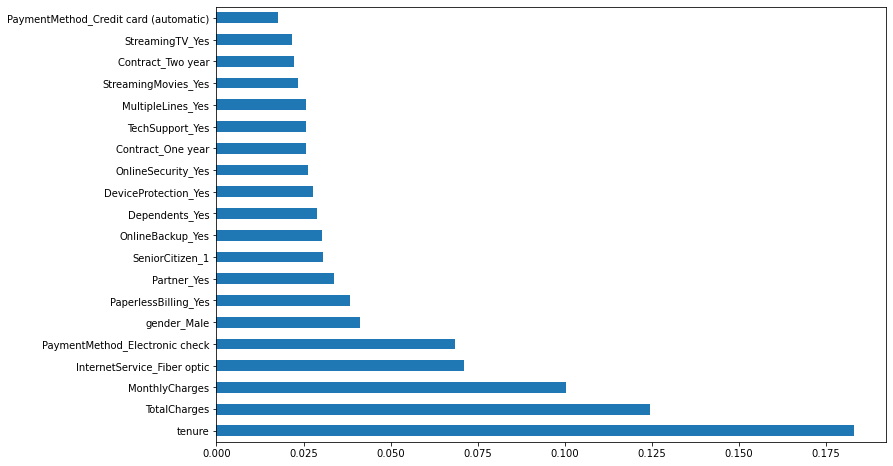

In [55]:
#Plotting a graph that shows the most important features based on correlation to Churn

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index = X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

### Fitting model using LogisticRegression 

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.334,shuffle =True, stratify = y,random_state =None)

In [57]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegressionCV

In [58]:
logmodel = LogisticRegressionCV(Cs = 100, cv =10,penalty= 'l2', solver = 'lbfgs', max_iter= 500)
logmodel.fit(X_train, y_train)

LogisticRegressionCV(Cs=100, cv=10, max_iter=500)

In [59]:
LRpred = logmodel.predict(X_test)

In [60]:
logmodel.score(X_train,y_train)

0.8126243957918681

In [61]:
logmodel.score(X_test,y_test)

0.796600566572238

In [62]:
preds = test

In [63]:
preds.shape

(1761, 23)

In [64]:
logmodel.predict_proba(preds)

array([[0.95729751, 0.04270249],
       [0.8966189 , 0.1033811 ],
       [0.97550964, 0.02449036],
       ...,
       [0.41268282, 0.58731718],
       [0.76972744, 0.23027256],
       [0.50030656, 0.49969344]])

In [65]:
from sklearn import metrics
print(metrics.accuracy_score(y_test ,LRpred))


0.796600566572238


In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, LRpred)

array([[1169,  130],
       [ 229,  237]], dtype=int64)

In [67]:
from sklearn.metrics import classification_report

print(classification_report(y_test, LRpred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1299
           1       0.65      0.51      0.57       466

    accuracy                           0.80      1765
   macro avg       0.74      0.70      0.72      1765
weighted avg       0.79      0.80      0.79      1765



In [68]:
from sklearn.metrics import roc_auc_score

In [69]:
logit_roc_auc = roc_auc_score(y_test , logmodel.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print (classification_report(y_test, logmodel.predict(X_test)))

Logistic AUC = 0.70
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1299
           1       0.65      0.51      0.57       466

    accuracy                           0.80      1765
   macro avg       0.74      0.70      0.72      1765
weighted avg       0.79      0.80      0.79      1765



In [70]:
from sklearn.metrics import roc_curve , auc
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])

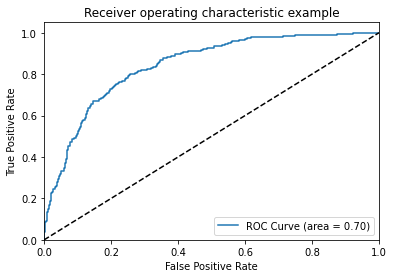

In [71]:
plt.figure()
plt.plot(fpr,tpr, label= 'ROC Curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = 'lower right')
plt.show()

In [72]:
#LRpred3 = logmodel.predict_proba(preds)
#LRpred3

In [73]:
#LRresults3 = pd.DataFrame(LRpred3)

In [74]:
#LRresults3.to_csv('LRresults3.csv')

In [75]:
#LogisticRegressionCV()

## Tuning the Model via GridSearchCV 

In [76]:
from sklearn.model_selection import GridSearchCV

params = [{'Cs':[1,10,100,1000], 'solver':['liblinear','lbfgs'],
          'tol':[0.0001,0.001,0.01,0.1]}]

grid_search = GridSearchCV(estimator = logmodel,
                           param_grid = params,
                           scoring = 'accuracy',
                             cv = 10, 
                              n_jobs = -1)
grid_search = grid_search.fit(X_train,y_train)

In [77]:
#LogisticRegressionCV()

LogisticRegressionCV()

In [78]:
logmod_accuracy = grid_search.best_score_
logmod_accuracy

0.81004921004921

In [79]:
grid_search.best_params_

{'Cs': 100, 'solver': 'liblinear', 'tol': 0.001}

In [110]:
# Modifiying the suggested parameters 

logmodel = LogisticRegressionCV(Cs = 100, cv =10,penalty= 'l2', solver = 'lbfgs', tol= 0.001, max_iter= 500)
logmodel.fit(X_train, y_train) 

LogisticRegressionCV(Cs=100, cv=10, max_iter=500, tol=0.001)

In [111]:
LRpred = logmodel.predict(X_test)

In [112]:
logmodel.score(X_train,y_train)

0.8126243957918681

In [113]:
logmodel.score(X_test,y_test)

0.796600566572238

In [109]:
logit_roc_auc = roc_auc_score(y_test , logmodel.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print (classification_report(y_test, logmodel.predict(X_test)))

Logistic AUC = 0.70
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1299
           1       0.65      0.51      0.57       466

    accuracy                           0.80      1765
   macro avg       0.74      0.70      0.72      1765
weighted avg       0.79      0.80      0.79      1765



In [84]:
#preds.shape

In [85]:
#LRaccuracy = round(metrics.accuracy_score(y_test, LRpred)*100, 2)
#LRaccuracy

In [86]:
#LRpred2 = logmodel.predict_proba(X_test)
#LRpred2

In [87]:
#LRresults= pd.DataFrame(LRpred2)

In [88]:
#LRresults.to_csv('LRresults.csv')

In [89]:
#test.head()

### RandomForest model for comparison

In [90]:
from sklearn.ensemble import RandomForestClassifier  

In [91]:
Rfmodel = RandomForestClassifier( n_estimators = 70, criterion = 'entropy', max_depth = 10, min_samples_split = 6 )

In [92]:
Rfmodel.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=6,
                       n_estimators=70)

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
#from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators' : (10,30,50,70,90,100),
                'criterion'  : ('gini','entropy') ,
                'max_depth'  : (3,5,7,9,10) ,
                 'max_features' : ('auto','sqrt'),
                 'min_samples_split' : (2,4,6)}

In [95]:
Rf_grid = GridSearchCV(RandomForestClassifier(n_jobs = -1, oob_score = False), param_grid = parameters, cv = 3, verbose = True)

In [96]:
Rf_grid_mod = Rf_grid.fit(X_train,y_train)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed:  2.0min finished


In [97]:
Rf_grid_mod.best_estimator_

RandomForestClassifier(max_depth=7, min_samples_split=4, n_estimators=70,
                       n_jobs=-1)

In [98]:
Rf_grid_mod.best_score_

0.8160311114602639

In [114]:
logit_roc_auc = roc_auc_score(y_test , Rfmodel.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print (classification_report(y_test, Rfmodel.predict(X_test)))

Logistic AUC = 0.68
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1299
           1       0.63      0.45      0.53       466

    accuracy                           0.78      1765
   macro avg       0.72      0.68      0.69      1765
weighted avg       0.77      0.78      0.77      1765



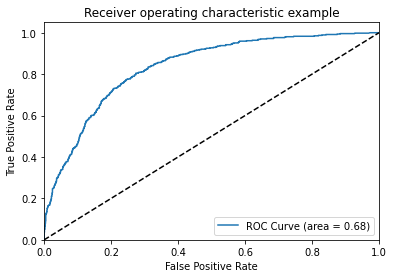

In [115]:
from sklearn.metrics import roc_curve , auc
fpr, tpr, thresholds = roc_curve(y_test, Rfmodel.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr,tpr, label= 'ROC Curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = 'lower right')
plt.show()

### Most important Visuals - combining features to see how they interact to impact Churn. 

Text(0.5, 1.0, 'Monthly Charges by Churn')

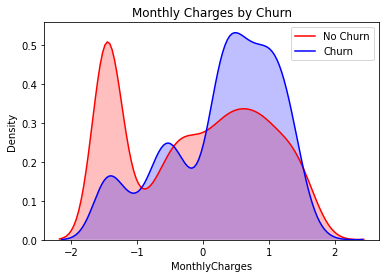

In [99]:
monthlycharges = sns.kdeplot(train.MonthlyCharges[(train['Churn']==0) ],
                            color = "Red", shade = True)
monthlycharges = sns.kdeplot(train.MonthlyCharges[(train['Churn']==1)],
                            ax=monthlycharges, color = "Blue", shade = True)
monthlycharges.legend(['No Churn','Churn'],loc = 'upper right')
monthlycharges.set_ylabel('Density')
monthlycharges.set_xlabel('MonthlyCharges')
monthlycharges.set_title('Monthly Charges by Churn') 

Text(0.5, 1.0, 'Total Charges by Churn')

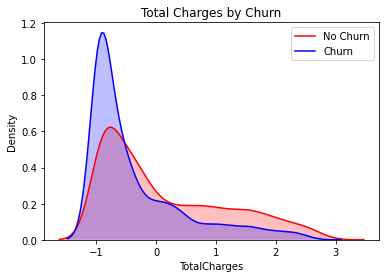

In [100]:
totalcharges = sns.kdeplot(train.TotalCharges[(train['Churn']==0) ],
                            color = "Red", shade = True)
totalcharges = sns.kdeplot(train.TotalCharges[(train['Churn']==1)],
                            ax=totalcharges, color = "Blue", shade = True)
totalcharges.legend(['No Churn','Churn'],loc = 'upper right')
totalcharges.set_ylabel('Density')
totalcharges.set_xlabel('TotalCharges')
totalcharges.set_title('Total Charges by Churn') 

### Insight : Churn is high when monthly charges are high

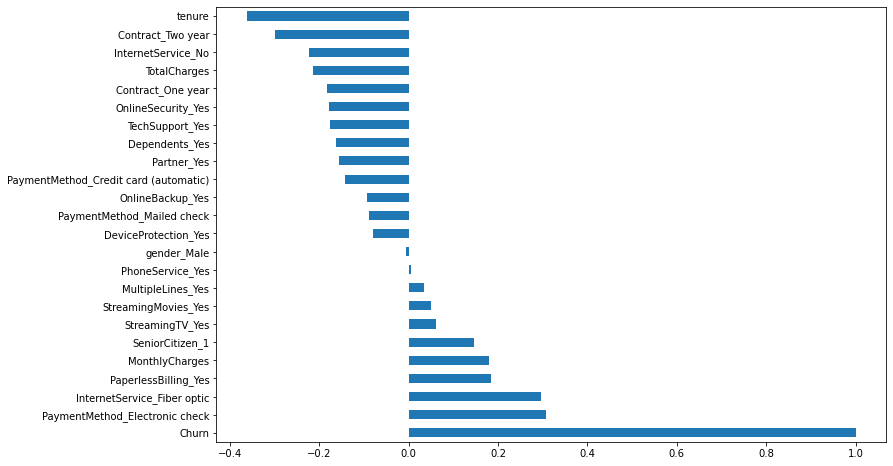

In [101]:
plt.figure(figsize = (12,8))
train.corr()['Churn'].sort_values(ascending = False).plot(kind = 'barh')

### Project Findings and Overview:  
The customer churn rate present in this company is slightly higher than the national average but is not too far from the norm. If attention is given to monthly contracts, charges for services, and , obviously, increasing tenure, this company can make many gains towards more profits. Upon further investigation I found that the majority of the 26% churned comes from customers with month-to-month contracts (23.46% to be exact). 

Logistic Regression fared well when compared to a Random Forest likely due to its universal innate robustness as a classifier. The models respectively achieved accuracies of 81.2% and 81.6% once optimization via SeachGridCV had been employed. Once deployed into Kaggle and scored, accuracy improved to 83.4%. However, the Random Forest produce a lower AUC which is a more complete metric.